In [58]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, natural_earth
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker
import matplotlib.patches as mpatches

def plot_examples_w_sites(all_outputs, sites=None):

    # Add transparent land by creating a custom feature
    land_shp = natural_earth(resolution='110m', category='physical', name='land')
    land_feature = ShapelyFeature(Reader(land_shp).geometries(),
                                  ccrs.PlateCarree(), facecolor='lightgray', edgecolor='face', alpha=0.5)
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    # Add countries boundaries and labels
    countries_shp = natural_earth(resolution='50m', category='cultural', name='admin_0_countries')
    countries_feature = ShapelyFeature(Reader(countries_shp).geometries(), ccrs.PlateCarree(),
                                       facecolor='none', edgecolor='black', linewidth=1, alpha=1)
    
    n_examples = 1
    
    n_models = len(all_outputs.keys())
    fig, axes = plt.subplots(n_models, n_examples, figsize=(20,15), layout="compressed")

    model_n = 0
    
    max_val = np.max([list(outputs) for outputs in all_outputs.values()])
    norm = None
    for model, outputs in all_outputs.items():

        for i in range(n_examples):
            ax = axes[model_n, i]

            ax.add_feature(land_feature)
            ax.add_feature(countries_feature)
            ax.add_feature(states_provinces, edgecolor='gray')
            ax.set_xticks([])
            ax.set_yticks([])

            # Plot gradient for model prediction on top of the land feature
            lonplot2 = np.linspace(135, 240, val.shape[1])
            latplot2 = np.linspace(-5, -60, val.shape[0])

            val = outputs[i]
            
            # Use a continuous colormap
            contour = ax.contourf(lonplot2, latplot2, val, levels=100, cmap='summer', transform=ccrs.PlateCarree(), norm=norm)
            if norm is None:
                norm = contour.norm
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                              linewidth=1, color='white', alpha=0.3, linestyle='--')
            gl.top_labels = False
            gl.right_labels = False
            if sites is not None:
                # 
                ax.scatter(sites)
                ax.set_extent([140, 200, -30, -5], crs=ccrs.PlateCarree())
                
            else:
                ax.set_extent([135, 240, -60, -5], crs=ccrs.PlateCarree())
            
        model_n += 1

    for model_idx, model in enumerate(all_outputs.keys()):
        ax = axes[model_idx, 0]
        ax.set_ylabel(model, rotation=0, ha='right')
        
    fig.colorbar(f, ax=axes)
    if save_path is not None:
        plt.savefig(save_path)
        plt.clf()
    else: 
        plt.show()

In [175]:
import cmocean

font_size = 24
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['legend.title_fontsize'] = font_size

def plot_example_outputs(all_outputs, save_path=None, sites=None, vmin=-0.1, vmax=.8, include_colorbar=True, colorbar_pad = 0.04):
    n_examples = 1
    # Add transparent land by creating a custom feature
    land_shp = natural_earth(resolution='110m', category='physical', name='land')
    land_feature = ShapelyFeature(Reader(land_shp).geometries(),
                                  ccrs.PlateCarree(), facecolor='lightgray', edgecolor='face', alpha=0.5)
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    
    # Add countries boundaries and labels
    countries_shp = natural_earth(resolution='50m', category='cultural', name='admin_0_countries')
    countries_feature = ShapelyFeature(Reader(countries_shp).geometries(), ccrs.PlateCarree(),
                                       facecolor='none', edgecolor='black', linewidth=1, alpha=1)
    
    n_models = len(all_outputs.keys())
    fig, axes = plt.subplots(1,n_models, figsize=(16,5), layout="compressed",  subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

    model_n = 0
    
    max_val = np.max([list(outputs) for outputs in all_outputs.values()])
    norm = None
    for model, outputs in all_outputs.items():

        for i in range(n_examples):
            ax = axes[model_n]

            ax.add_feature(land_feature)
            ax.add_feature(countries_feature)
            #ax.add_feature(states_provinces, edgecolor='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            
            val = outputs[i]
            
            # Plot gradient for model prediction on top of the land feature
            lonplot2 = np.linspace(135, 240, val.shape[1])
            latplot2 = np.linspace(-5, -60, val.shape[0])

            
            # Use a continuous colormap
            contour = ax.contourf(lonplot2, latplot2, val, levels=100, cmap=cmocean.cm.matter, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, norm=norm)
            if norm is None:
                norm = contour.norm
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                              linewidth=1, color='white', alpha=0.3, linestyle='--')
            gl.top_labels = False
            gl.right_labels = False
            if sites is not None:
                # s
                y, x = zip(*sites)
                
                x = [x[i] - 180 for i in range(len(x))]
                ax.scatter(x, y, s=5, c='lime')
                ax.set_extent([150, 190, -23, -5], crs=ccrs.PlateCarree())
                
            else:
                # add a patch over the pacific islands region
                #150, 185, -23, -5
                xy = [150, -23]
                width = 40 
                height = 18
        
                ax.add_patch(mpatches.Rectangle(xy=xy, width=width, height=height,
                                        facecolor='none', edgecolor='g',
                                        transform=ccrs.PlateCarree(), zorder=10, linewidth=3))
                ax.set_extent([135, 240, -60, -5], crs=ccrs.PlateCarree())
            
        model_n += 1

    for model_idx, model in enumerate(all_outputs.keys()):
        model_title = model
        if model == "DDPM UNet": model_title = "UNet"
        elif model == "DDPM UNet N=100 Decades": model_title = "UNet N=100 Decades"
        elif model == "Nearest Neighbors Regressor": model_title = "Nearest Neighbors"
        ax = axes[model_idx]
        if sites is None:
            ax.set_title(model_title)
        else:
            ax.set_xlabel(model_title)

    if include_colorbar:

        
        cb = fig.colorbar(contour, ax=axes, fraction=1, pad=colorbar_pad, aspect = 40, location='bottom', extend=True)
       

        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()

    plt.margins(0)
    if save_path is not None:
        plt.savefig(save_path, dpi=1000, bbox_inches='tight', pad_inches=0.5)
        plt.clf()
    else: 
        plt.show()


In [255]:
all_predictions = np.load('all_predictions_in_domain.npy', allow_pickle=True)[()]

#all_predictions.pop("DDPM UNet N=100 Decades")
#all_predictions.pop("FNO N=100 Decades")
storm_outputs = all_predictions.pop("STORM")

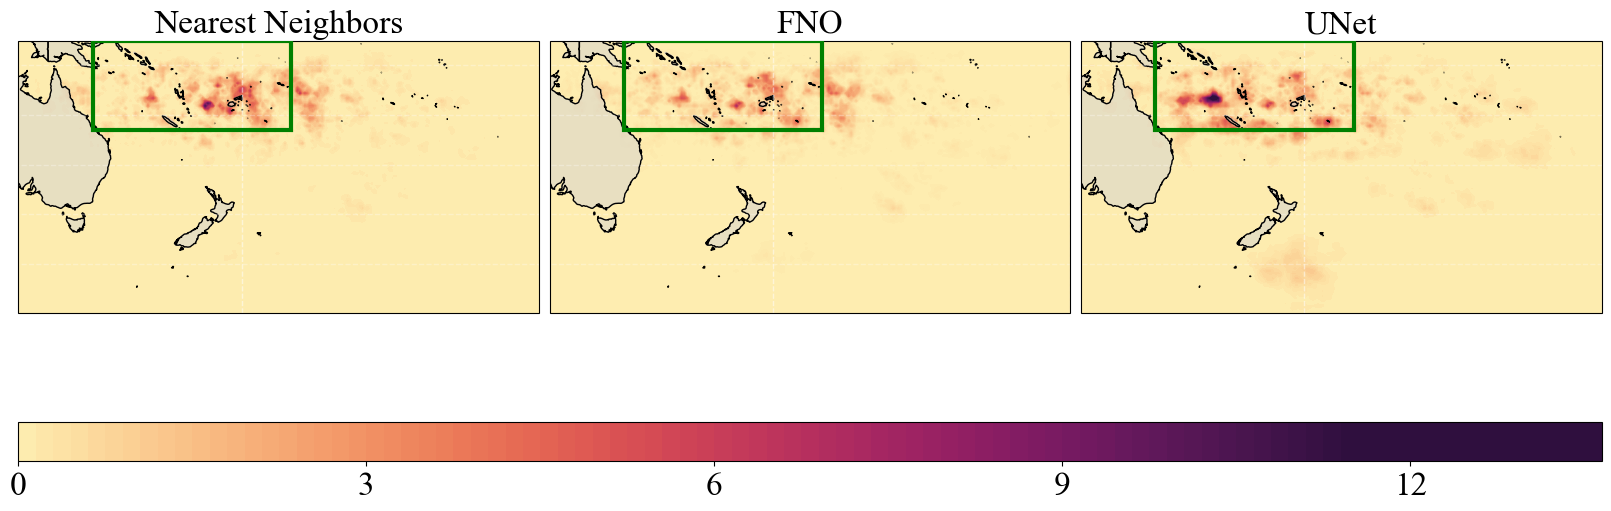

In [170]:
# plot differences

storm_prediction = all_predictions["STORM"][0]
differences = {model: 1000*np.array(([storm_prediction - all_predictions[model][0]]))**2 for model in all_predictions.keys() if model != "STORM"}

plot_example_outputs(differences, vmin=0, vmax=11.5, include_colorbar=True, colorbar_pad = 0.002)

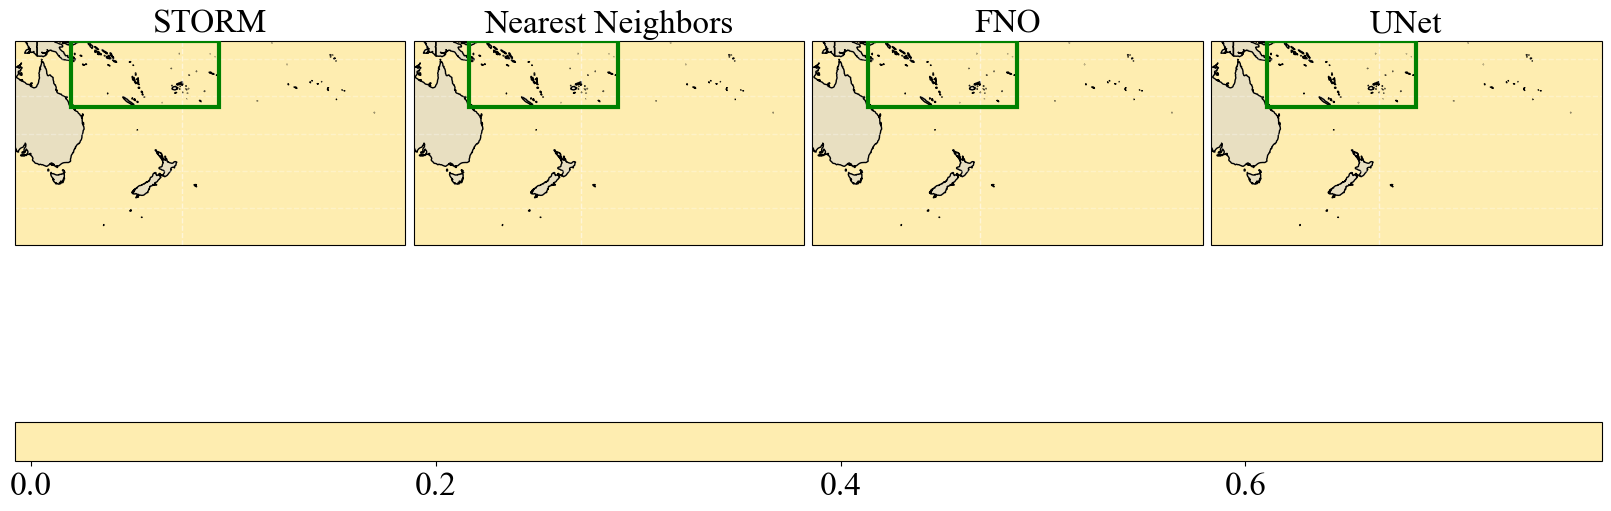

In [174]:
## plot full size example outputs with bounding box

plot_example_outputs(all_predictions)

In [61]:
## add project to path

import sys

sys.path.append('../')

In [62]:
## get sites

from HealthFacilities.getHealthFacilityData import Sites

sites = Sites().sites


In [141]:
#all_predictions.pop('Nearest Neighbors Regressor')
#all_predictions.pop('DDPM UNet')

plot_example_outputs(all_predictions, sites=sites, save_path='example_outputs_zoomed.png')

<Figure size 1600x500 with 0 Axes>